In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# loading dataframe

twitter_ids = ['flipkartsupport', 'UberINSupport', 'ola_supports', 'gmail']
dfs = {twid: pd.read_csv('./features-'+twid+'.csv', index_col=(0,))
       for twid in twitter_ids}

ola_df = dfs['ola_supports']
uber_df = dfs['UberINSupport']
flipkart_df = dfs['flipkartsupport']
gmail_df = dfs['gmail']

In [3]:
ola_df.columns.values

array(['created_at_hour', 'cust_tid', 'favorite_count', 'has_profanity',
       'in_business_hours', 'n_favorites', 'n_followers', 'n_following',
       'n_hashtags', 'n_links', 'n_mentions', 'n_statuses', 'org_tid',
       'protected', 'ratio_hashtags', 'ratio_numeric',
       'ratio_user_mentions', 'responded_at_hour', 'responded_in',
       'responded_in_bh', 'retweet_count', 'sentiment', 'source',
       'tweet_length', 'user_age', 'verified'], dtype=object)

In [4]:
# preparing histogram of traffic with hour
created_at_hour_hist = {
    'ola': np.histogram(ola_df['created_at_hour'], bins=range(25))[0],
    'uber': np.histogram(uber_df['created_at_hour'], bins=range(25))[0],
    'flipkart': np.histogram(flipkart_df['created_at_hour'], bins=range(25))[0],
    'gmail': np.histogram(gmail_df['created_at_hour'], bins=range(25))[0]
}

Plotting histogram of `created_at_hour`.
This shows traffic for every hour of the day.

The horizontal line shows the mean value.
Purpose is to point out hours when the usage is higher than the mean usage.
This is when more people are required to resolve queries.

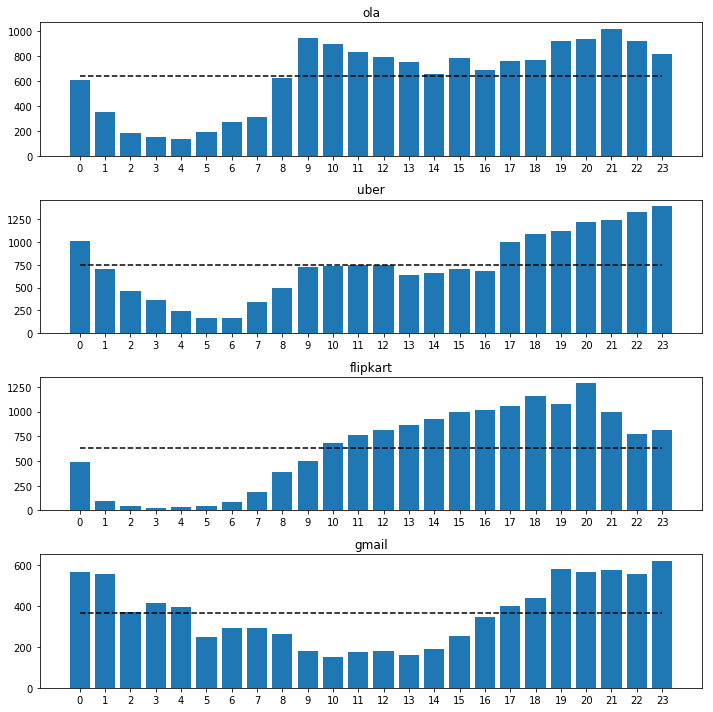

In [5]:
# plotting histogram of created_at_hour
fig, axs = plt.subplots(4)
for pos, (tid, h) in enumerate(created_at_hour_hist.items()):
    axs[pos].bar(np.arange(24), h)
    axs[pos].set_title(tid)
    axs[pos].hlines(np.mean(h), 0, 23, label='median', linestyle='dashed')
    axs[pos].set_xticks(range(24))
    
fig.set_size_inches(10, 10)
fig.tight_layout()

Doing the same for `responded_at`

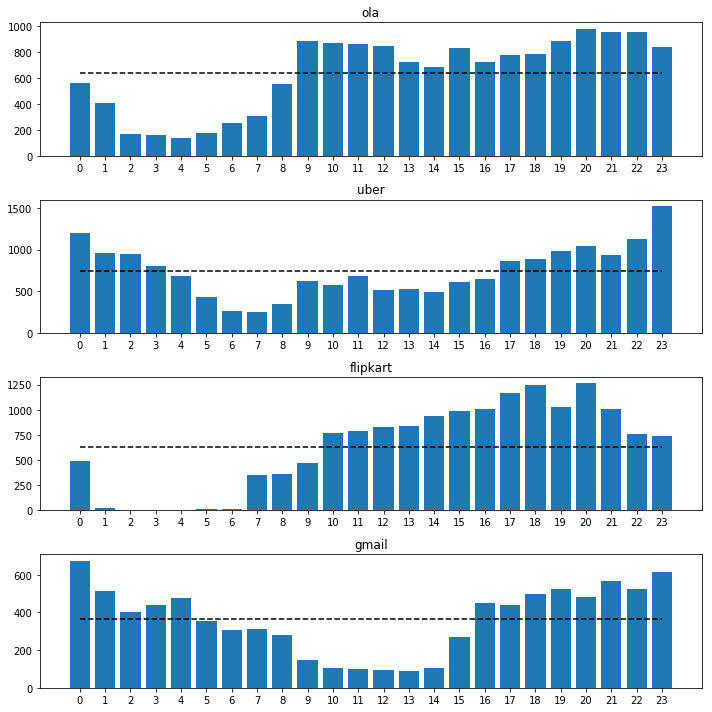

In [6]:
# preparing histogram of traffic with hour
created_at_hour_hist = {
    'ola': np.histogram(ola_df['responded_at_hour'], bins=range(25))[0],
    'uber': np.histogram(uber_df['responded_at_hour'], bins=range(25))[0],
    'flipkart': np.histogram(flipkart_df['responded_at_hour'], bins=range(25))[0],
    'gmail': np.histogram(gmail_df['responded_at_hour'], bins=range(25))[0]
}

# plotting histogram of created_at_hour
fig, axs = plt.subplots(4)
for pos, (tid, h) in enumerate(created_at_hour_hist.items()):
    axs[pos].bar(np.arange(24), h)
    axs[pos].set_title(tid)
    axs[pos].hlines(np.mean(h), 0, 23, label='mean', linestyle='dashed')
    axs[pos].set_xticks(range(24))
    
fig.set_size_inches(10, 10)
fig.tight_layout()

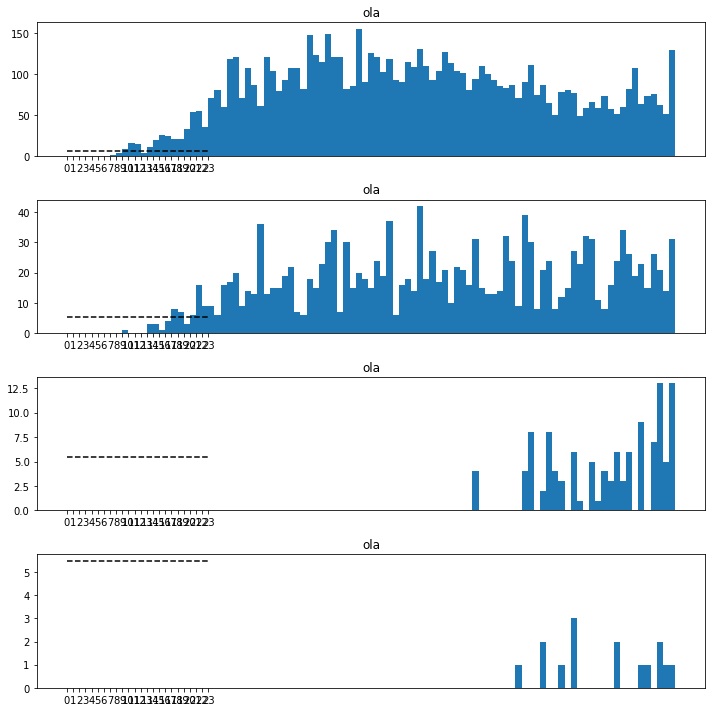

In [68]:
# preparing histogram of traffic with hour
created_at_hour_hist = {
    'ola': np.histogram(ola_df['responded_in']),
    'uber': np.histogram(uber_df['responded_in']),
    'flipkart': np.histogram(flipkart_df['responded_in']),
    'gmail': np.histogram(gmail_df['responded_in'])
}

# plotting histogram of created_at_hour
fig, axs = plt.subplots(4)
for pos, twid in enumerate(twitter_ids):
    axs[pos].hist(dfs[twid]['responded_in'], bins=range(100))
    axs[pos].set_title(tid)
    axs[pos].hlines(np.median(h), 0, 23, label='median', linestyle='dashed')
    axs[pos].set_xticks(range(24))
    
fig.set_size_inches(10, 10)
fig.tight_layout()

<br/>

What is the **mean** and **median** response time in minutes?

In [40]:
print('Mean response time')
pd.DataFrame(
    [
        [df['responded_in'].mean() // 60, df['responded_in_bh'].mean() // 60]
        for df in [dfs[twid] for twid in twitter_ids]
    ],
    index=['ola', 'uber', 'flipkart', 'gmail'],
    columns=['Responded in (minutes)', 'Responded in (business minutes)']
)

Mean response time


,Responded in (minutes),Responded in (business minutes)
ola,290.0,69.0
uber,193.0,42.0
flipkart,119.0,31.0
gmail,432.0,106.0


In [42]:
print('Median response time')
pd.DataFrame(
    [
        [df['responded_in'].median() // 60, df['responded_in_bh'].median() // 60]
        for df in [dfs[twid] for twid in twitter_ids]
    ],
    index=['ola', 'uber', 'flipkart', 'gmail'],
    columns=['Responded in (minutes)', 'Responded in (business minutes)']
)

Median response time


,Responded in (minutes),Responded in (business minutes)
ola,1.0,-0.0
uber,37.0,-0.0
flipkart,5.0,-0.0
gmail,26.0,-0.0


In [67]:
np.histogram(ola_df['responded_in_bh'].sort_values() // (60*60), bins=range(100))

(array([14762,    62,    46,    21,    23,    19,    40,    32,    89,
            9,     9,    10,    10,    18,    10,    24,    42,     3,
            3,     0,     2,     1,     2,     7,    15,     0,     0,
            1,     2,     6,     0,     0,    26,     0,     0,     0,
            0,     1,     1,     2,    10,     2,     0,     3,     1,
            0,     0,     0,     1,     0,     0,     0,     1,     0,
            0,     1,     2,     0,     0,     0,     0,     2,     0,
            2,     2,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     2,
            1,     0,     1,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     2,     0,     0]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 4

In [140]:
def get_correlation(key1, key2): 
    return pd.DataFrame({twid: np.corrcoef(dfs[twid][key1], dfs[twid][key2]).reshape(1,4)[0]
     for twid in twitter_ids
    }, index=[key1+'--'+key1, key1+'--'+key2, key2+'--'+key1, key2+'--'+key2]).iloc[2]

In [141]:
get_correlation('created_at_hour', 'responded_in')

flipkartsupport   -0.023532
UberINSupport      0.039883
ola_supports       0.023371
gmail             -0.009524
Name: responded_in--created_at_hour, dtype: float64

In [146]:
get_correlation('favorite_count', 'responded_in')

flipkartsupport   -0.005570
UberINSupport      0.001457
ola_supports      -0.001632
gmail             -0.008095
Name: responded_in--favorite_count, dtype: float64

In [147]:
get_correlation('retweet_count', 'responded_in')

flipkartsupport   -0.003476
UberINSupport     -0.002590
ola_supports      -0.000493
gmail              0.000737
Name: responded_in--retweet_count, dtype: float64

In [148]:
get_correlation('in_business_hours', 'responded_in')

flipkartsupport   -0.001792
UberINSupport      0.103911
ola_supports       0.013427
gmail              0.006328
Name: responded_in--in_business_hours, dtype: float64

In [149]:
get_correlation('verified', 'responded_in')

flipkartsupport    0.034563
UberINSupport      0.004997
ola_supports       0.039144
gmail              0.034484
Name: responded_in--verified, dtype: float64

In [150]:
get_correlation('user_age', 'responded_in')

flipkartsupport   -0.008828
UberINSupport     -0.005790
ola_supports      -0.009093
gmail              0.032151
Name: responded_in--user_age, dtype: float64

In [151]:
get_correlation('n_hashtags', 'responded_in')

flipkartsupport   -0.018369
UberINSupport     -0.020684
ola_supports      -0.026025
gmail             -0.003993
Name: responded_in--n_hashtags, dtype: float64

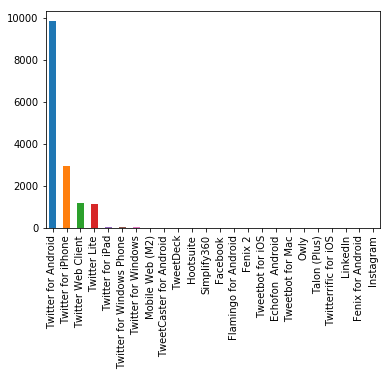

In [169]:
pd.value_counts(ola_df['source']).plot.bar()

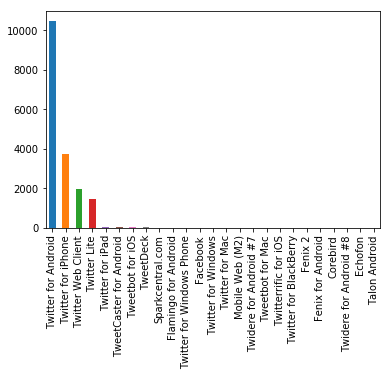

In [170]:
pd.value_counts(uber_df['source']).plot.bar()

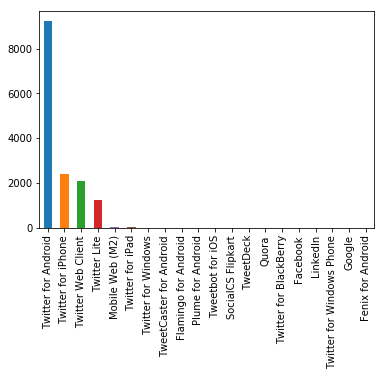

In [182]:
pd.value_counts(flipkart_df['source']).plot.bar()

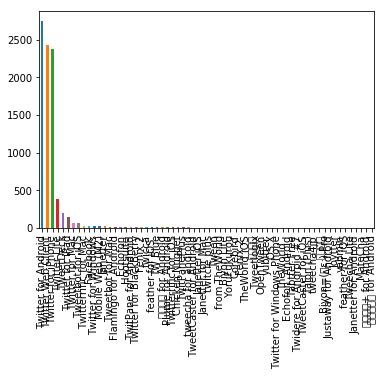

In [186]:
pd.value_counts(gmail_df['source']).plot.bar()

In [189]:
ola_df['n_links'].var()

0.029956215503908767

In [202]:
ola_df['created_at_hour'].std()

6.316978145373965